# ***Holistically-Nested Edge Detection with OpenCV and Deep Learning***

In [1]:
pip install opencv-python matplotlib ipywidgets torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.9 MB/s eta 0:00:00


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import os
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn

In [3]:
# Clone the CrackForest dataset
!git clone https://github.com/cuilimeng/CrackForest-dataset.git
dataset_path = './CrackForest-dataset/image/'

Cloning into 'CrackForest-dataset'...
remote: Enumerating objects: 407, done.
remote: Total 407 (delta 0), reused 0 (delta 0), pack-reused 407 (from 1)
Receiving objects: 100% (407/407), 9.60 MiB | 14.83 MiB/s, done.
Resolving deltas: 100% (3/3), done.


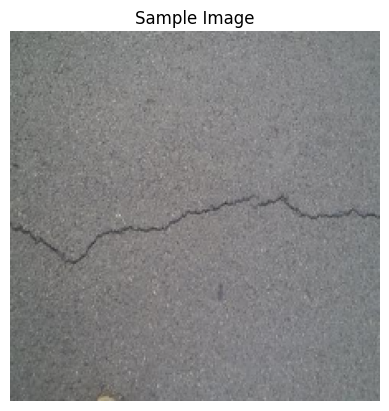

In [4]:
def load_image(file_path):
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))  # Resize to a fixed size
    return img

# Display a sample image to verify loading
sample_image_path = dataset_path + '001.jpg'
sample_image = load_image(sample_image_path)

plt.imshow(sample_image)
plt.title("Sample Image")
plt.axis("off")
plt.show()

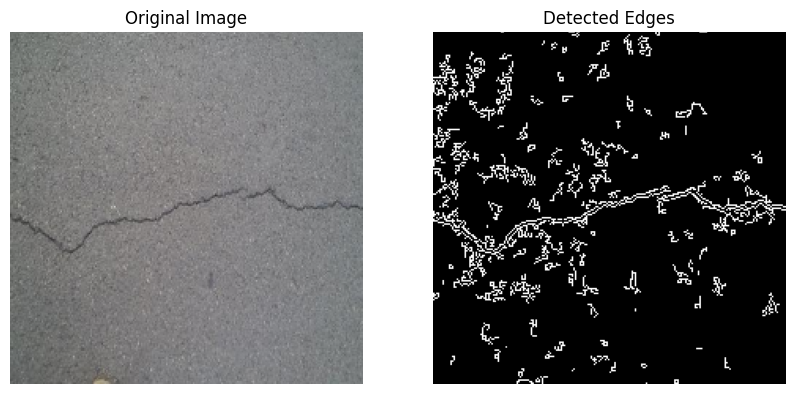

In [5]:
class SimpleEdgeDetector:
    def __init__(self, low_threshold=50, high_threshold=150):
        self.low_threshold = low_threshold
        self.high_threshold = high_threshold

    def detect_edges(self, image):
        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        # Apply Canny edge detection
        edges = cv2.Canny(gray, self.low_threshold, self.high_threshold)
        return edges

# Instantiate edge detector and test on sample image
edge_detector = SimpleEdgeDetector()
edges = edge_detector.detect_edges(sample_image)

# Display original and edge-detected images side-by-side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Detected Edges")
plt.axis("off")
plt.show()

In [6]:
# GUI components
image_selector = widgets.Dropdown(
    options=[f for f in os.listdir(dataset_path) if f.endswith('.jpg')],
    description='Select Image:',
    style={'description_width': 'initial'},
)

low_threshold_slider = widgets.IntSlider(
    value=50,
    min=0,
    max=255,
    step=1,
    description='Low Threshold',
    style={'description_width': 'initial'},
    continuous_update=False,
)

high_threshold_slider = widgets.IntSlider(
    value=150,
    min=0,
    max=255,
    step=1,
    description='High Threshold',
    style={'description_width': 'initial'},
    continuous_update=False,
)

output_area = widgets.Output()
title = widgets.HTML("<h1>Holistically-Nested Edge Detection</h1>")
footer = widgets.HTML("<p style='text-align: center;'>Created by AI Innovators</p>")

def update_edge_detection(change):
    with output_area:
        output_area.clear_output()

        # Load selected image
        image_path = dataset_path + image_selector.value
        image = load_image(image_path)

        # Adjust thresholds based on slider values
        edge_detector.low_threshold = low_threshold_slider.value
        edge_detector.high_threshold = high_threshold_slider.value

        # Detect edges and display results
        edges = edge_detector.detect_edges(image)

        # Display original and edge-detected images
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(edges, cmap='gray')
        plt.title("Detected Edges")
        plt.axis("off")

        plt.show()

# Link widgets to update function
image_selector.observe(update_edge_detection, names='value')
low_threshold_slider.observe(update_edge_detection, names='value')
high_threshold_slider.observe(update_edge_detection, names='value')

# Display GUI layout
display(widgets.VBox([title, image_selector, low_threshold_slider, high_threshold_slider, output_area, footer]))

# **HAPPY COADING**